<a href="https://colab.research.google.com/github/javierRM33/Evidencias-de-Clase/blob/main/Activity_8_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/census.csv'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly
import plotly.express as px
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy import stats
from sklearn.cluster import KMeans
from scipy import stats
from sklearn import linear_model
plt.style.use('ggplot')

In [ ]:
#Visualizamos la estructura de la base de datos
df = pd.read_csv(path)
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [ ]:
df.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013',
       'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMI

In [ ]:
!pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming df is your DataFrame containing the data
rdf = df[['STATE', 'NETMIG2012']]
rdf.loc[:, 'STATE'] = rdf['STATE'].astype('str')
rdf.dtypes

# Drop missing values
rdf.dropna(inplace=True)

# Check for missing values
print(rdf.isnull().any())

# Fit the linear regression model
modelB = smf.ols(formula='NETMIG2012 ~ STATE', data=rdf)
resultB = modelB.fit()

# Print the summary of the linear regression model
print(resultB.summary())

# Print the description of residuals
print(resultB.resid.describe())

# Print the description of fitted values
print(resultB.fittedvalues.describe())


STATE         False
NETMIG2012    False
dtype: bool
                            OLS Regression Results                            
Dep. Variable:             NETMIG2012   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.303
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           6.72e-07
Time:                        19:11:23   Log-Likelihood:                -32519.
No. Observations:                3193   AIC:                         6.514e+04
Df Residuals:                    3142   BIC:                         6.545e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

<ipython-input-237-13c549526456>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.loc[:, 'STATE'] = rdf['STATE'].astype('str')
<ipython-input-237-13c549526456>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.dropna(inplace=True)


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming df is your DataFrame containing the data
rdf = df[['STATE', 'NETMIG2012']]
rdf.loc[:, 'STATE'] = rdf['STATE'].astype('str')

# Drop missing values
rdf.dropna(inplace=True)

# Fit the linear regression model
modelB = smf.ols(formula='NETMIG2012 ~ STATE', data=rdf)
resultB = modelB.fit()

# Calculate the median value of the residuals
median_residual = resultB.resid.median()

# Print the median value of the residuals
print("On calculating, the median value of the residue is", median_residual)


On calculating, the median value of the residue is -179.02479338843034


<ipython-input-238-219ce8fa26dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.loc[:, 'STATE'] = rdf['STATE'].astype('str')
<ipython-input-238-219ce8fa26dc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.dropna(inplace=True)


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming df is your DataFrame containing the data
rdf = df[['STATE', 'NETMIG2012']]
rdf.loc[:, 'STATE'] = rdf['STATE'].astype('str')

# Drop missing values
rdf.dropna(inplace=True)

# Fit the linear regression model
modelB = smf.ols(formula='NETMIG2012 ~ STATE', data=rdf)
resultB = modelB.fit()

# Calculate the interquartile range (IQR) of the residuals
residuals_q1 = resultB.resid.quantile(0.25)
residuals_q3 = resultB.resid.quantile(0.75)
residuals_iqr = residuals_q3 - residuals_q1

# Print the result
print(f"I would like to know the impact of STATE in NETMIG2012.\n")
print(f"The Inter Quartile Range (IQR) of the residue is {residuals_iqr:.2f}")


<ipython-input-239-6e05aa06fdea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.loc[:, 'STATE'] = rdf['STATE'].astype('str')
<ipython-input-239-6e05aa06fdea>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.dropna(inplace=True)


I would like to know the impact of STATE in NETMIG2012.

The Inter Quartile Range (IQR) of the residue is 774.93


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming df is your DataFrame containing the data
rdf = df[['STATE', 'NETMIG2012']]
rdf.loc[:, 'STATE'] = rdf['STATE'].astype('str')

# Drop missing values
rdf.dropna(inplace=True)

# Fit the linear regression model
modelB = smf.ols(formula='NETMIG2012 ~ STATE', data=rdf)
resultB = modelB.fit()

# Calculate the interquartile range (IQR) of the residuals
residuals_q1 = resultB.resid.quantile(0.25)
residuals_q3 = resultB.resid.quantile(0.75)
residuals_iqr = residuals_q3 - residuals_q1

# Print the result with all decimals
print(f"I would like to know the impact of STATE in NETMIG2012.\n")
print(f"The Inter Quartile Range (IQR) of the residue is {residuals_iqr}")


<ipython-input-240-4d2b0633a9c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.loc[:, 'STATE'] = rdf['STATE'].astype('str')
<ipython-input-240-4d2b0633a9c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.dropna(inplace=True)


I would like to know the impact of STATE in NETMIG2012.

The Inter Quartile Range (IQR) of the residue is 774.9295522387931


In [ ]:
rdf = df [['STATE','NETMIG2012']]
rdf.STATE = rdf.STATE.astype('str')
rdf.dtypes
rdf.dropna(inplace=True)
rdf.isnull().any()
modelB=sm.OLS.from_formula('NETMIG2012 ~ STATE',
                           data= rdf)
resultB= modelB.fit()
resultB.summary()
resultB.resid.describe()
resultB.fittedvalues.describe()

<ipython-input-241-a2a32de8dd21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.STATE = rdf.STATE.astype('str')
<ipython-input-241-a2a32de8dd21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.dropna(inplace=True)


count     3193.000000
mean       594.000000
std       1227.325944
min       -879.320388
25%         16.160000
50%        151.403509
75%        772.750000
max      10029.000000
dtype: float64

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming df is your DataFrame containing the data
rdf = df[['STATE', 'NETMIG2012']]
rdf.loc[:, 'STATE'] = rdf['STATE'].astype('str')

# Drop missing values
rdf.dropna(inplace=True)

# Fit the linear regression model
modelB = smf.ols(formula='NETMIG2012 ~ STATE', data=rdf)
resultB = modelB.fit()

# Calculate the median of the residuals
residuals_median = resultB.resid.median()

# Print the result
print(f"I would like to know the impact of STATE in NETMIG2012.\n")
print(f"On calculating, The median value of the residue is {residuals_median:.2f}")


<ipython-input-242-f07bbe2ddf98>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.loc[:, 'STATE'] = rdf['STATE'].astype('str')
<ipython-input-242-f07bbe2ddf98>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.dropna(inplace=True)


I would like to know the impact of STATE in NETMIG2012.

On calculating, The median value of the residue is -179.02


In [ ]:
rdf = df[['STATE', 'NETMIG2012']]
rdf.STATE = rdf.STATE.astype('str')
rdf.dtypes 
rdf.dropna(inplace=True)
rdf.isnull().any()
modelB =sm.OLS.from_formula('NETMIG2012 ~ STATE', 
                            data = rdf)
resultB = modelB.fit()
resultB.summary()
resultB.resid.describe()
resultB.fittedvalues.describe()

<ipython-input-243-1c62e912f717>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.STATE = rdf.STATE.astype('str')
<ipython-input-243-1c62e912f717>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.dropna(inplace=True)


count     3193.000000
mean       594.000000
std       1227.325944
min       -879.320388
25%         16.160000
50%        151.403509
75%        772.750000
max      10029.000000
dtype: float64

In [ ]:
alaska_df = df[df['STNAME'] == 'Alaska']
average_deaths2015_alaska = alaska_df['DEATHS2015'].mean()
print("El promedio de DEATHS2015 para Alaska es:", average_deaths2015_alaska)


El promedio de DEATHS2015 para Alaska es: 285.46666666666664


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame containing the data
# Select the relevant features and target variable
features = ['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014']
target = 'DEATHS2015'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the value of 'DEATHS2015' for Alaska using the trained model
alaska_df = df[df['STNAME'] == 'Alaska']
X_alaska = alaska_df[features]
y_alaska_pred = model.predict(X_alaska)

print("Predicted value of DEATHS2015 for Alaska is:", y_alaska_pred)


Predicted value of DEATHS2015 for Alaska is: [2120.83010598   92.08881554  131.93171742  418.42423081  142.23605546
  105.34958523   61.91057547  105.76631718 -361.99274671  105.36604498
   74.29358296  208.42859825  711.49679382  256.6659049   113.06399995
   92.55543663   79.92082111  693.54609455  120.91729444   97.9667558
  162.57514433   88.43589205  119.73294752  112.73406245   87.55507932
  215.12380969   15.40004559   72.75721771   92.76918868  117.04248896]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame containing the data
# Select the relevant features and target variable
features = ['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014']
target = 'DEATHS2015'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate the average of the features for Alaska
alaska_df = df[df['STNAME'] == 'Alaska']
X_alaska_mean = alaska_df[features].mean().values.reshape(1, -1)

# Predict the value of 'DEATHS2015' for Alaska using the trained model
y_alaska_pred = model.predict(X_alaska_mean)

print("Predicted value of DEATHS2015 for Alaska is:", y_alaska_pred[0])


Predicted value of DEATHS2015 for Alaska is: 215.16306200255804


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing the data
grouped_by_state = df.groupby('STATE')['NETMIG2012'].median()

# Print the median value of NETMIG2012 for each state
print(grouped_by_state)


STATE
1       -75.5
2        -4.0
4       121.5
5       -75.0
6      -115.0
8        -3.0
9     -1214.0
10     2193.5
11    10029.0
12     1345.0
13      -97.0
15      838.0
16      -69.0
17     -122.0
18      -94.0
19      -45.0
20      -26.5
21      -38.0
22     -149.0
23      -35.0
24      177.0
25      364.0
26      -49.0
27      -65.5
28     -116.0
29      -47.5
30       22.0
31      -14.5
32       48.0
33      212.0
34     -364.5
35     -126.5
36     -219.0
37       36.0
38       49.0
39     -198.0
40       -6.0
41       25.0
42       -6.0
44     -294.0
45      -42.0
46        5.0
47       40.5
48        6.0
49      -51.0
50      -96.0
51       26.5
53       14.0
54      -12.5
55     -105.0
56       59.0
Name: NETMIG2012, dtype: float64


In [ ]:
# Calculate the residue for each row in the DataFrame
df['residue'] = df.apply(lambda row: row['NETMIG2012'] - grouped_by_state[row['STATE']], axis=1)

# Calculate the overall median of the residue
median_residue = df['residue'].median()

print("The median value of the residue is:", median_residue)


The median value of the residue is: 0.0


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming rdf is your DataFrame

# Change the data type of the STATE column
rdf.STATE = rdf.STATE.astype('str')

# Drop missing values
rdf.dropna(inplace=True)

# Fit the linear regression model
modelB = smf.ols('NETMIG2012 ~ STATE', data=rdf)
resultB = modelB.fit()

# Print the summary of the regression model
print(resultB.summary())


<ipython-input-249-a3aa20b68b6d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.STATE = rdf.STATE.astype('str')
<ipython-input-249-a3aa20b68b6d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.dropna(inplace=True)


                            OLS Regression Results                            
Dep. Variable:             NETMIG2012   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.303
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           6.72e-07
Time:                        19:11:24   Log-Likelihood:                -32519.
No. Observations:                3193   AIC:                         6.514e+04
Df Residuals:                    3142   BIC:                         6.545e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     116.9118    783.581      0.149      

In [ ]:
df.isnull().any()

SUMLEV         False
REGION         False
DIVISION       False
STATE          False
COUNTY         False
               ...  
RNETMIG2012    False
RNETMIG2013    False
RNETMIG2014    False
RNETMIG2015    False
residue        False
Length: 101, dtype: bool

In [ ]:
Favs = ['STNAME', 'DEATHS2015']

In [ ]:
ndf = df[Favs]
ndf= ndf.dropna()
ndf.head()#.isnull().any()

,STNAME,DEATHS2015
0,Alabama,50330
1,Alabama,467
2,Alabama,1992
3,Alabama,309
4,Alabama,223


In [ ]:
x= ndf [['STNAME']]
y= ndf[['DEATHS2015']]

In [ ]:
lm = linear_model.LinearRegression()

In [ ]:
favs =['STNAME', 'DEATHS2015']
ndf = df[favs]
ndf = ndf.dropna()
ndf['STNAME'] = ndf['DEATHS2015'].astype(str)

In [ ]:
modelSA = sm.OLS.from_formula('DEATHS2015 ~ STNAME', data=ndf)


In [ ]:
resultSA = modelSA.fit()
resultSA.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATHS2015   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.183e+28
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:11:29   Log-Likelihood:                 70861.
No. Observations:                3193   AIC:                        -1.391e+05
Df Residuals:                    1886   BIC:                        -1.312e+05
Df Model:                        1306                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.796e-12   2.74e-11      0.175      0.861   -4.89e-11    5.85e-11
STNAME[T.1]          1.0000   5.81e-11   1.72e+10      0.000       1.000       1.000
STNAME[T.10]        10.0000   4.24e-11   2.36e+11      0.000      10.000      10.000
STNAME[T.100]      100.0000   3.87e-11   2.58e+12      0.000     100.000     100.000
STNAME[T.1003]    1003.0000   5.81e-11   1.73e+13      0.000    1003.000    1003.000
STNAME[T.1006]    1006.0000   7.74e-11    1.3e+13      0.000    1006.000    1006.000
STNAME[T.1009]    1009.0000   7.74e-11    1.3e+13      0.000    1009.000    1009.000
STNAME[T.101]      101.0000   3.87e-11   2.61e+12      0.000     101.000     101.000
STNAME[T.1010]    1010.0000   7.74e-11    1.3e+13      0.000    1010.000    1010.000
STNAME[T.1013]    1013.0000   5.81e-11   1.74e+13      0.000    1013.000    1013.000
STNAME[T.1015]    1015.0000   5.81e-11   1.75e+13      0.000    1015.000    1015.000
STNAME[T.1017]    1017.0000   5.81e-11   1.75e+13      0.000    1017.000    1017.000
STNAME[T.10175]   1.017e+04   7.74e-11   1.31e+14      0.000    1.02e+04    1.02e+04
STNAME[T.1018]    1018.0000   5.81e-11   1.75e+13      0.000    1018.000    1018.000
STNAME[T.1019]    1019.0000   7.74e-11   1.32e+13      0.000    1019.000    1019.000
STNAME[T.102]      102.0000   3.75e-11   2.72e+12      0.000     102.000     102.000
STNAME[T.1021]    1021.0000   5.81e-11   1.76e+13      0.000    1021.000    1021.000
STNAME[T.1024]    1024.0000   7.74e-11   1.32e+13      0.000    1024.000    1024.000
STNAME[T.10261]   1.026e+04   7.74e-11   1.33e+14      0.000    1.03e+04    1.03e+04
STNAME[T.1027]    1027.0000   5.81e-11   1.77e+13      0.000    1027.000    1027.000
STNAME[T.103]      103.0000   4.24e-11   2.43e+12      0.000     103.000     103.000
STNAME[T.1031]    1031.0000   7.74e-11   1.33e+13      0.000    1031.000    1031.000
STNAME[T.1032]    1032.0000   7.74e-11   1.33e+13      0.000    1032.000    1032.000
STNAME[T.1033]    1033.0000   7.74e-11   1.33e+13      0.000    1033.000    1033.000
STNAME[T.10343]   1.034e+04   7.74e-11   1.34e+14      0.000    1.03e+04    1.03e+04
STNAME[T.1035]    1035.0000   7.74e-11   1.34e+13      0.000    1035.000    1035.000
STNAME[T.1037]    1037.0000   5.81e-11   1.79e+13      0.000    1037.000    1037.000
STNAME[T.104]      104.0000   3.75e-11   2.77e+12      0.000     104.000     104.000
STNAME[T.104233]  1.042e+05   7.74e-11   1.35e+15      0.000    1.04e+05    1.04e+05
STNAME[T.1045]    1045.0000      5e-11   2.09e+13      0.000    1045.000    1045.000
STNAME[T.1046]    1046.0000   7.74e-11   1.35e+13      0.000    1046.000    1046.000
STNAME[T.1047]    1047.0000   7.74e-11   1.35e+13      0.000    1047.000    1047.000
STNAME[T.10470]   1.047e+04   7.74e-11   1.35e+14      0.000    1.05e+04    1.05e+04
STNAME[T.1048]    1048.

In [ ]:
modelSA = sm.OLS.from_formula('DEATHS2015 ~ STNAME',
                              data = ndf
)


In [ ]:
favs = ['STNAME', 'DEATHS2015']
ndf = df[favs]
ndf = ndf.dropna()

modelSA = sm.OLS.from_formula('DEATHS2015 ~ STNAME',
                              data = ndf
)

resultSA = modelSA.fit()
resultSA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATHS2015   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.973
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           6.10e-05
Time:                        19:11:31   Log-Likelihood:                -33718.
No. Observations:                3193   AIC:                         6.754e+04
Df Residuals:                    3142   BIC:                         6.785e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1480.2941   1140.488      1.298      0.194    -755.883    3716.471
STNAME[T.Alaska]               -1194.8275   2061.309     -0.580      0.562   -5236.477    2846.822
STNAME[T.Arizona]               5173.8309   2613.187      1.980      0.048      50.105    1.03e+04
STNAME[T.Arkansas]              -706.5836   1569.876     -0.450      0.653   -3784.669    2371.502
STNAME[T.California]            7354.4177   1673.272      4.395      0.000    4073.600    1.06e+04
STNAME[T.Colorado]              -399.4941   1631.398     -0.245      0.807   -3598.208    2799.219
STNAME[T.Connecticut]           5096.1503   3335.914      1.528      0.127   -1444.641    1.16e+04
STNAME[T.Delaware]              2742.2059   4838.682      0.567      0.571   -6745.090    1.22e+04
STNAME[T.District of Columbia]  3737.7059   6747.219      0.554      0.580   -9491.697     1.7e+04
STNAME[T.Florida]               4129.5588   1612.894      2.560      0.011     967.127    7291.991
STNAME[T.Georgia]               -517.1441   1361.439     -0.380      0.704   -3186.544    2152.256
STNAME[T.Hawaii]                2414.3725   4005.263      0.603      0.547   -5438.824    1.03e+04
STNAME[T.Idaho]                 -954.6941   1807.273     -0.528      0.597   -4498.249    2588.861
STNAME[T.Illinois]               543.6476   1469.502      0.370      0.711   -2337.634    3424.929
STNAME[T.Indiana]               -221.4554   1500.591     -0.148      0.883   -3163.693    2720.782
STNAME[T.Iowa]                  -925.7341   1478.242     -0.626      0.531   -3824.151    1972.683
STNAME[T.Kansas]               -1024.8036   1461.209     -0.701      0.483   -3889.825    1840.218
STNAME[T.Kentucky]              -768.1288   1425.375     -0.539      0.590   -3562.888    2026.631
STNAME[T.Louisiana]             -153.4018   1631.398     -0.094      0.925   -3352.115    3045.312
STNAME[T.Maine]                   82.8824   2550.209      0.033      0.974   -4917.362    5083.127
STNAME[T.Maryland]              2351.5459   2199.694      1.069      0.285   -1961.436    6664.528
STNAME[T.Massachusetts]         5891.8392   2682.775      2.196      0.028     631.671    1.12e+04
STNAME[T.Michigan]               682.1345   1534.168      0.445      0.657   -2325.938    3690.207
STNAME[T.Minnesota]             -567.9759   1518.489     -0.374      0.708   -3545.307    2409.355
STNAME[T.Mississippi]           -762.1736   1538.297     -0.495      0.620   -3778.342    2253.995
STNAME[T.Missouri]              -506.3114   1436.384     -0.352      0.724   -3322.658    2310.035
STNAME[T.Montana]              -1157.3467   1688.917     -0.685      0.493   -4468.839    2154.146
STNAME[T.Nebraska]             -1167.5920   1497.216     -0.780      0.436   -4103.212    1768.028
STNAME[T.Nevad

In [ ]:
df.STNAME.unique

<bound method Series.unique of 0       Alabama
1       Alabama
2       Alabama
3       Alabama
4       Alabama
         ...   
3188    Wyoming
3189    Wyoming
3190    Wyoming
3191    Wyoming
3192    Wyoming
Name: STNAME, Length: 3193, dtype: object>

In [ ]:
favs = ['INTERNATIONALMIG2011' , 'STATE']
ndf = df[favs]
ndf = ndf.dropna()
ndf['STATE'] = ndf['STATE'].astype(str)

In [ ]:
modelSA = sm.OLS.from_formula('INTERNATIONALMIG2011 ~ STATE', data=ndf)

resultSA = modelSA.fit()
resultSA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     INTERNATIONALMIG2011   R-squared:                       0.048
Model:                              OLS   Adj. R-squared:                  0.032
Method:                   Least Squares   F-statistic:                     3.137
Date:                  Fri, 24 Mar 2023   Prob (F-statistic):           1.46e-12
Time:                          19:11:31   Log-Likelihood:                -31465.
No. Observations:                  3193   AIC:                         6.303e+04
Df Residuals:                      3142   BIC:                         6.334e+04
Df Model:                            50                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     144.8824    563.324      0.257      0.797    -959.637    1249.402
STATE[T.10]   969.1176   2389.980      0.405      0.685   -3716.962    5655.197
STATE[T.11]  3206.1176   3332.668      0.962      0.336   -3328.308    9740.543
STATE[T.12]  3096.8824    796.660      3.887      0.000    1534.856    4658.909
STATE[T.13]   132.4551    672.458      0.197      0.844   -1186.047    1450.957
STATE[T.15]  2123.4510   1978.328      1.073      0.283   -1755.494    6002.396
STATE[T.16]   -82.6157    892.670     -0.093      0.926   -1832.891    1667.660
STATE[T.17]   409.8361    725.834      0.565      0.572   -1013.321    1832.993
STATE[T.18]    58.1069    741.190      0.078      0.938   -1395.158    1511.372
STATE[T.19]   -48.0824    730.151     -0.066      0.947   -1479.703    1383.539
STATE[T.2]    -44.0824   1018.147     -0.043      0.965   -2040.382    1952.218
STATE[T.20]   -49.7880    721.738     -0.069      0.945   -1464.914    1365.338
STATE[T.21]   -60.1881    704.038     -0.085      0.932   -1440.609    1320.233
STATE[T.22]    62.2561    805.800      0.077      0.938   -1517.691    1642.203
STATE[T.23]    -7.2353   1259.630     -0.006      0.995   -2477.016    2462.545
STATE[T.24]  1962.3176   1086.499      1.806      0.071    -168.003    4092.638
STATE[T.25]  4514.3176   1325.108      3.407      0.001    1916.152    7112.483
STATE[T.26]   283.0224    757.775      0.373      0.709   -1202.761    1768.806
STATE[T.27]   140.7767    750.031      0.188      0.851   -1329.823    1611.376
STATE[T.28]  -100.4727    759.814     -0.132      0.895   -1590.255    1389.310
STATE[T.29]   -14.3134    709.476     -0.020      0.984   -1405.397    1376.771
STATE[T.30]  -123.5490    834.210     -0.148      0.882   -1759.201    1512.103
STATE[T.31]   -74.3504    739.523     -0.101      0.920   -1524.347    1375.646
STATE[T.32]   683.5621   1231.320      0.555      0.579   -1730.711    3097.835
STATE[T.33]   175.4813   1509.646      0.116      0.907   -2784.511    3135.474
STATE[T.34]  4312.5722   1139.378      3.785      0.000    2078.571    6546.573
STATE[T.35]   -16.1765    975.705     -0.017      0.987   -1929.260    1896.908
STATE[T.36]  3434.9589    812.313      4.229      0.000    1842.241    5027.677
STATE[T.37]   211.6721    728.686      0.290      0.771   -1217.077    1640.422
STATE[T.38]  -106.5120    846.722     -0.126      0.900   -1766.697    1553.673
STATE[T.39]   208.2637    748.192      0.278      0.781   -1258.730    1675.257
STATE[T.4]   1434.8676   1290.737      1.112      0.266   -1095.905    3965.640
STATE[T.40]   -17.3952    770.703     -0.023      0.982   -1528.528    1493.737
STATE[T.41]   179.9285    948.968      0.190      0.850   -1680.732    2040.589
STATE[T.42]   648.6176    796.660      0.814      0.416    -913.409    2210.644
STATE[T.44]  1184.784

In [ ]:
df_region2 = df[df['REGION'] == 'REGION 2']

# Calcula el promedio de BIRTHS2015 en la REGION 2
promedio = df_region2['BIRTHS2015'].mean()

print('El promedio de BIRTHS2015 en la REGION 2 es:', promedio)

El promedio de BIRTHS2015 en la REGION 2 es: nan


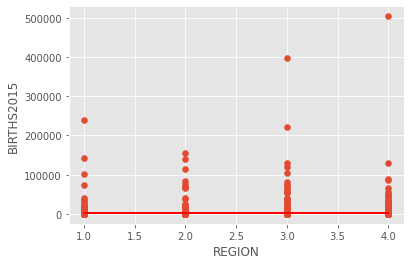

In [ ]:
X = df[['REGION']]  # Columna que representa la variable independiente
y = df['BIRTHS2015']  # Columna que representa la variable dependiente

# Crea un objeto de regresión lineal y ajusta el modelo
reg = LinearRegression().fit(X, y)

# Calcula los valores predichos para X
y_pred = reg.predict(X)

# Grafica los puntos de datos y la línea de regresión
plt.style.use('ggplot')
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('REGION')
plt.ylabel('BIRTHS2015')
plt.show()

In [ ]:
favs = ['BIRTHS2015', 'REGION'] # Nombres de las columnas de interés
ndf = df[favs].dropna()

# Crea el modelo de regresión lineal y ajusta el modelo
model = sm.OLS.from_formula('BIRTHS2015 ~ REGION', data=ndf)
result = model.fit()

# Imprime un resumen de los resultados
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             BIRTHS2015   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2982
Date:                Fri, 24 Mar 2023   Prob (F-statistic):              0.585
Time:                        19:11:32   Log-Likelihood:                -35377.
No. Observations:                3193   AIC:                         7.076e+04
Df Residuals:                    3191   BIC:                         7.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1995.3664    959.037      2.081      0.0

In [ ]:
# Paso 1: Importar bibliotecas
import pandas as pd
import statsmodels.formula.api as smf

# Paso 2: Leer datos desde archivo CSV
data = pd.read_csv("https://raw.githubusercontent.com/tec03/Datasets/main/datasets/census.csv")

# Paso 3: Seleccionar las columnas de interés
data_subset = data[["BIRTHS2015", "REGION"]]

# Paso 4: Filtrar datos para la REGION 2
data_region2 = data_subset[data_subset["REGION"] == 2]

# Paso 5: Ajustar un modelo de regresión lineal
model = smf.ols("BIRTHS2015 ~ 1", data=data_region2).fit()

# Paso 6: Realizar predicciones utilizando el modelo ajustado
mean_births_region2 = model.predict().mean()
print("El promedio de nacimientos en la REGION 2 es:", mean_births_region2)


El promedio de nacimientos en la REGION 2 es: 1565.3327085285853


In [ ]:
model = smf.ols("BIRTHS2015 ~ REGION", data=data_region2).fit()

# Paso 6: Predecir valores para la REGION 2
region2_predicted = model.predict(pd.DataFrame({"REGION": [2]}))
print("El valor previsto de BIRTHS2015 para la REGION 2 es:", region2_predicted[0])

El valor previsto de BIRTHS2015 para la REGION 2 es: 1565.33270852859


In [ ]:
# Paso 1: Importar bibliotecas
import pandas as pd
import statsmodels.formula.api as smf

# Paso 2: Leer datos desde archivo CSV
data = pd.read_csv("https://raw.githubusercontent.com/tec03/Datasets/main/datasets/census.csv")

# Paso 3: Seleccionar las columnas de interés
data_subset = data[["BIRTHS2015", "REGION"]]

# Paso 4: Filtrar datos para la REGION 2
data_region2 = data_subset[data_subset["REGION"] == 2]

# Paso 5: Ajustar un modelo de regresión lineal simple
model = smf.ols("BIRTHS2015 ~ REGION", data=data_region2).fit()

# Paso 6: Predecir valores para la REGION 2
predicted_value = model.predict(pd.DataFrame({"REGION": [2]}))
print("El valor predicho de BIRTHS2015 para la REGION 2 es:", predicted_value[0])


El valor predicho de BIRTHS2015 para la REGION 2 es: 1565.33270852859


In [ ]:
# Paso 1: Importar bibliotecas
import pandas as pd
import statsmodels.formula.api as smf

# Paso 2: Leer datos desde archivo CSV
data = pd.read_csv("https://raw.githubusercontent.com/tec03/Datasets/main/datasets/census.csv")

# Paso 3: Seleccionar las columnas de interés
data_subset = data[["BIRTHS2015", "REGION"]]

# Paso 4: Filtrar datos para la REGION 2
data_region2 = data_subset[data_subset["REGION"] == 2]

# Paso 5: Ajustar un modelo de regresión lineal simple
model = smf.ols("BIRTHS2015 ~ REGION", data=data_region2).fit()

# Paso 6: Predecir valores para la REGION 2
predicted_value = model.predict(pd.DataFrame({"REGION": [2]}))
print("El valor predicho de BIRTHS2015 para la REGION 2 es:", predicted_value[0])


El valor predicho de BIRTHS2015 para la REGION 2 es: 1565.33270852859


In [ ]:
k = [float(x) for x in input("Please enter the numbers (comma in between): ").split(',')]

Please enter the numbers (comma in between): 2


In [ ]:
observation = np.array(k).reshape(1, -1) # to make a 2d array. since lm.prediction need 2Darray
observation

array([[2.]])

In [ ]:
study_table = pd.DataFrame({
    "BIRTHS2015": data_region2["BIRTHS2015"],
    "REGION": data_region2["REGION"],
    "PredictedValue": predicted_value
})

# Paso 8: Renombrar columnas y calcular la diferencia
study_table.columns = ["BIRTHS2015", "REGION", "PredictedValue"]
study_table["difference"] = study_table["BIRTHS2015"] - study_table["PredictedValue"]

# Paso 9: Imprimir la tabla de estudio
print(study_table)

      BIRTHS2015  REGION  PredictedValue  difference
0            NaN     NaN     1565.332709         NaN
608     156440.0     2.0             NaN         NaN
609        837.0     2.0             NaN         NaN
610        102.0     2.0             NaN         NaN
611        162.0     2.0             NaN         NaN
...          ...     ...             ...         ...
3164      3791.0     2.0             NaN         NaN
3165       524.0     2.0             NaN         NaN
3166       230.0     2.0             NaN         NaN
3167      1847.0     2.0             NaN         NaN
3168       792.0     2.0             NaN         NaN

[1068 rows x 4 columns]


In [ ]:
# Paso 1: Importar bibliotecas
import pandas as pd
from sklearn import linear_model

# Paso 2: Leer datos desde archivo CSV
df = pd.read_csv("https://raw.githubusercontent.com/tec03/Datasets/main/datasets/census.csv")

# Paso 3: Seleccionar las columnas de interés
X = pd.DataFrame(df["REGION"]) # Variable independiente
y = pd.DataFrame(df["BIRTHS2015"]) # Variable dependiente

# Paso 4: Ajustar un modelo de regresión lineal simple
lm = linear_model.LinearRegression()
model_lm = lm.fit(X, y)   # BIRTHS2015 = b0 + b1*REGION

# Paso 5: Pedir al usuario ingresar valores de REGION para predecir BIRTHS2015
z = [int(x) for x in input("Por favor, ingrese el valor de REGION para predecir BIRTHS2015 (separe los valores por comas): ").split(',')]
a = pd.DataFrame(z)

# Paso 6: Predecir valores de BIRTHS2015
b = model_lm.predict(a)
b = pd.DataFrame(b)

# Paso 7: Crear una tabla de estudio para ver los resultados
df_new = pd.concat([a,b], axis=1)
df_new.columns = ["new_REGION", "predict_BIRTHS2015"]

# Paso 8: Imprimir la tabla de estudio
print(df_new)


Por favor, ingrese el valor de REGION para predecir BIRTHS2015 (separe los valores por comas): 2
   new_REGION  predict_BIRTHS2015
0           2         2371.060111


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Selecting the variables to use in the regression
X = df[['STATE']]
y = df['INTERNATIONALMIG2011']

# Creating an instance of the linear regression model
model = LinearRegression()

# Fitting the model
model.fit(X, y)

# Calculating the median of the predicted values
median_pred = np.median(model.predict(X))
print("The median value of the predicted value is:", median_pred)


The median value of the predicted value is: 584.0702912221243


In [ ]:
import pandas as pd
from sklearn import linear_model

# cargar los datos
df = pd.read_csv("https://raw.githubusercontent.com/tec03/Datasets/main/datasets/census.csv")

# filtrar los datos
data = df[['INTERNATIONALMIG2011', 'STATE']]

# ajustar el modelo de regresión lineal simple
lm = linear_model.LinearRegression()
X = data[['STATE']]
y = data['INTERNATIONALMIG2011']
model_lm = lm.fit(X, y)

# predecir los valores de INTERNATIONALMIG2011
predicted = model_lm.predict(X)

# calcular el IQR de los valores predichos
iqr = pd.Series(predicted).quantile(0.75) - pd.Series(predicted).quantile(0.25)

print("The Inter Quartile Range (IQR) of the predicted value is:", iqr)


The Inter Quartile Range (IQR) of the predicted value is: 289.03728272402077
